# **1. Perkenalan Dataset**


Sumber Dataset : https://www.kaggle.com/datasets/kurniatilaelimunifah/prsa-data-aotizhongxin


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Install library yang dibutuhkan
!pip install pandas numpy scikit-learn imbalanced-learn mlflow joblib matplotlib seaborn
!pip install -U imbalanced-learn
!pip install dagshub
!pip install dagshub mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.14.0
    Uninstalling imbalanced-learn-

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import mlflow
import mlflow.sklearn
import mlflow.keras
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import dagshub
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/Tugas Akhir MSML/PRSA_Data_Aotizhongxin.csv'

df = pd.read_csv(file_path)

print("Beberapa baris pertama dari dataset:")
print(df.head())


Mounted at /content/drive
Beberapa baris pertama dari dataset:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [5]:
df.shape

(35064, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,925
PM10,718
SO2,935
NO2,1023
CO,1776


In [8]:
df.duplicated().sum()

np.int64(0)

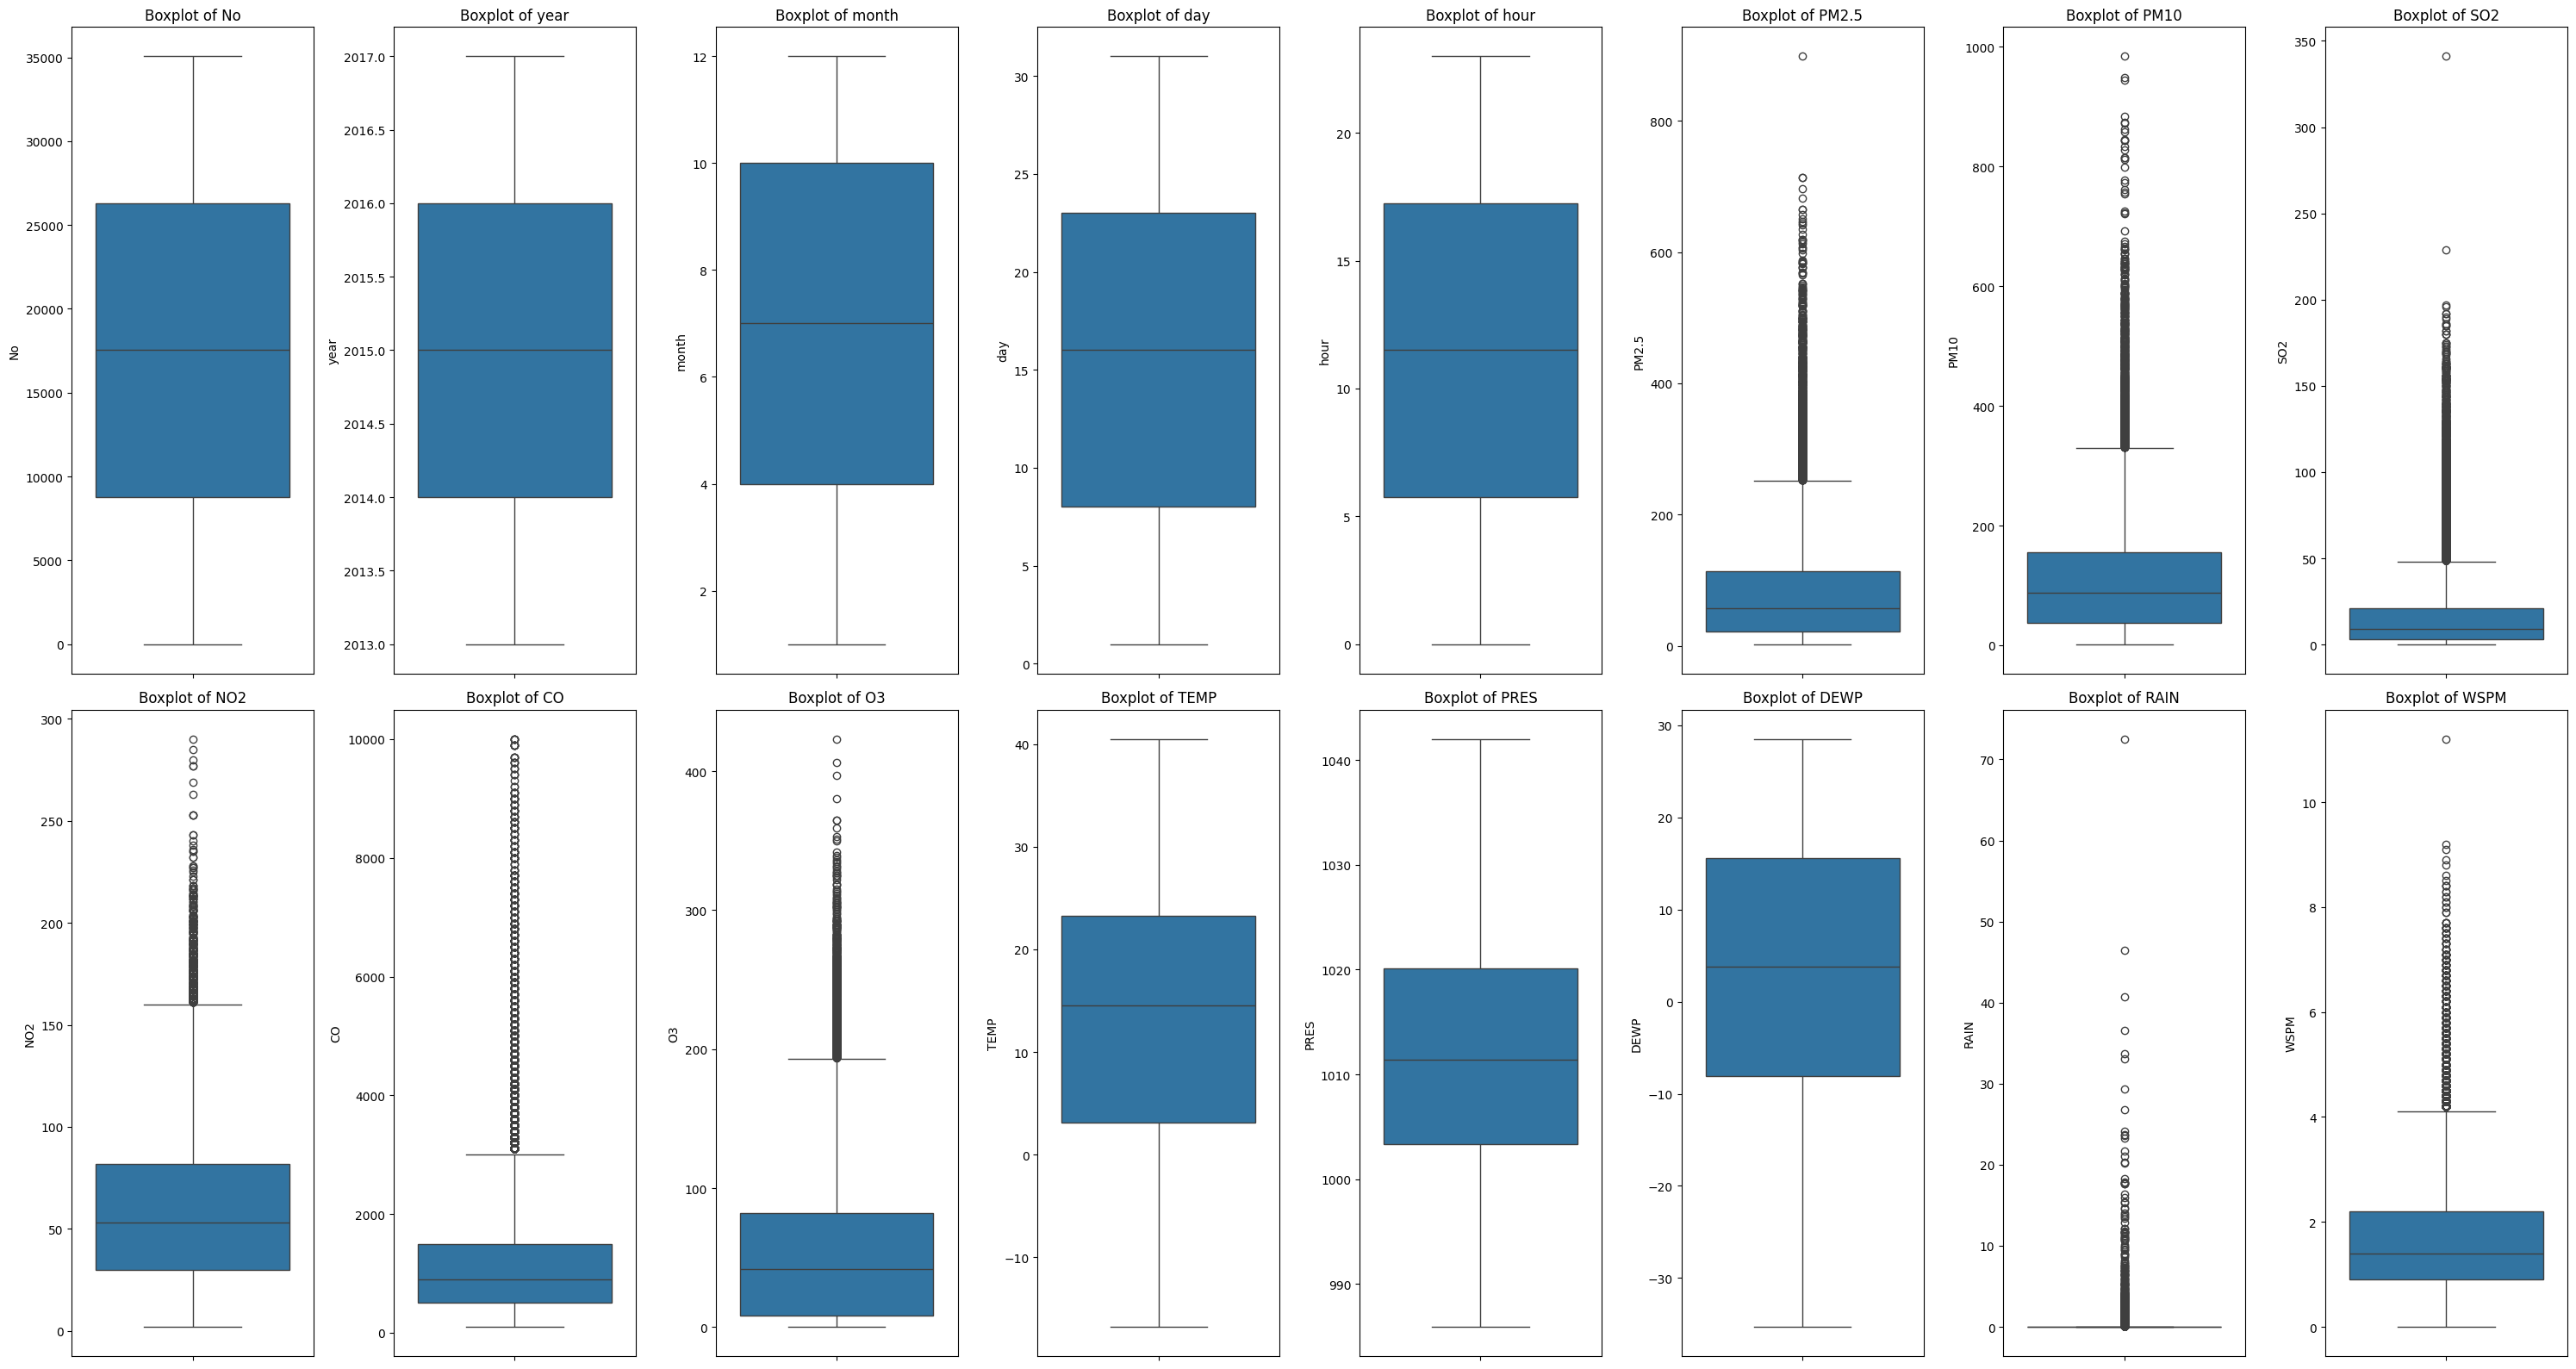

In [9]:
# Mengatur ukuran figure
plt.figure(figsize=(30, 16))

# Loop melalui setiap kolom dalam dataset
df_select_numeric = df.select_dtypes(include=['number']) # Hanya kolom numerik
for i, col in enumerate(df_select_numeric.columns, 1):
    plt.subplot(2, (len(df_select_numeric.columns) + 1) // 2, i)
    sns.boxplot(y=df_select_numeric[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()

In [10]:
df_numeric = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]
df_numeric.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


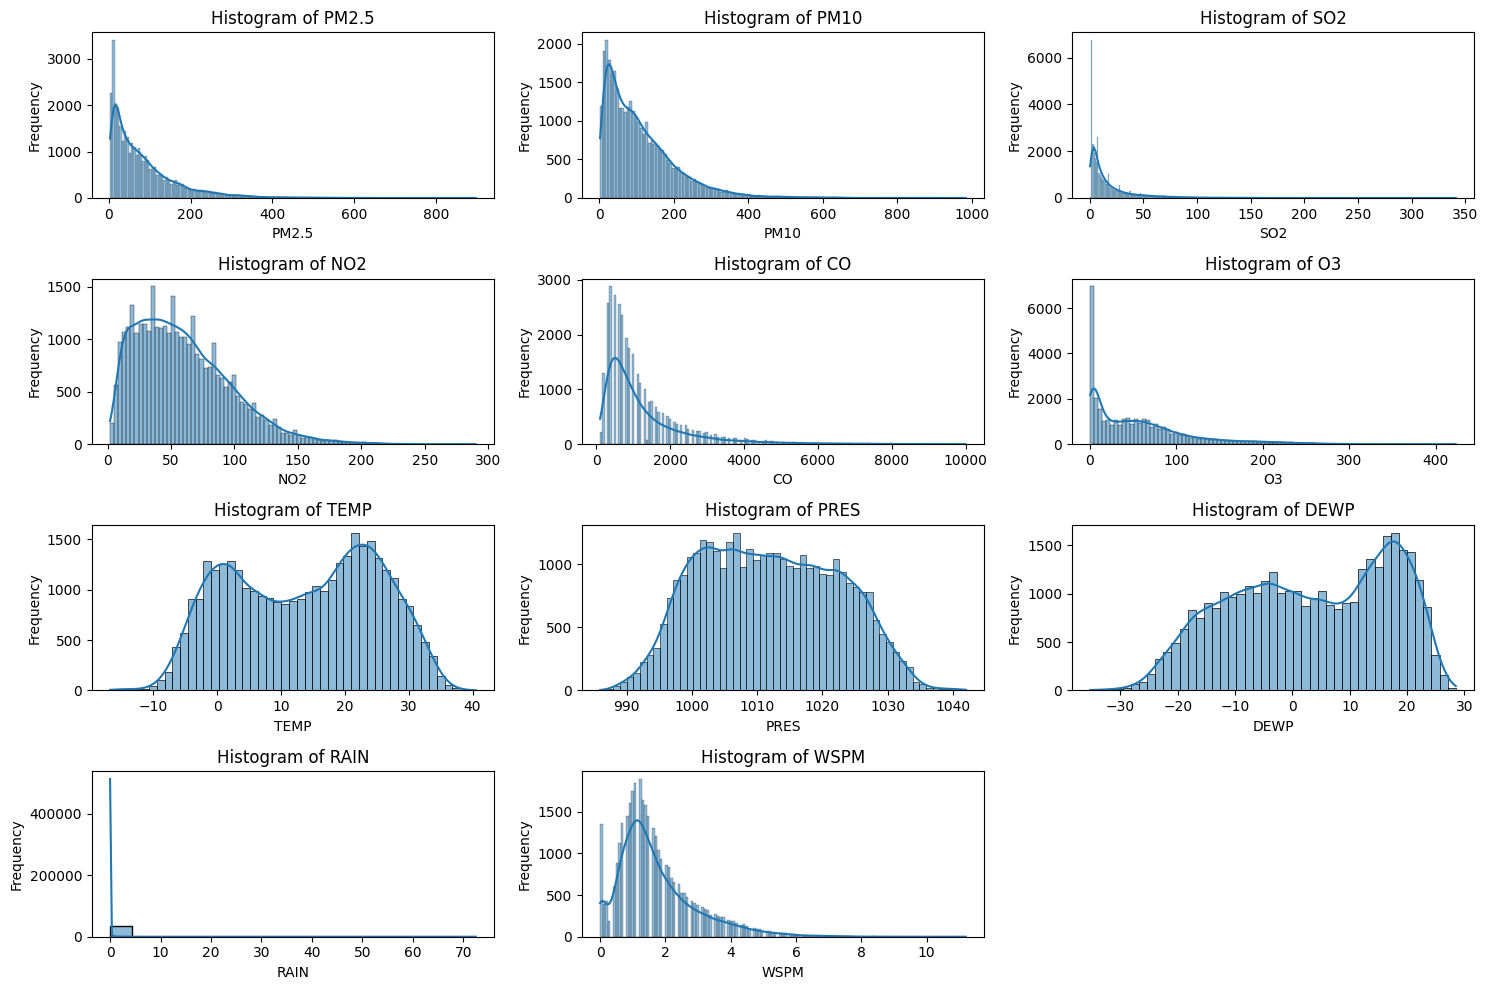

In [11]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Iterate through each numeric column and create a histogram
for i, col in enumerate(df_numeric.columns):
    plt.subplot(4, 3, i + 1)  # Adjust subplot layout as needed
    sns.histplot(df_numeric[col], kde=True)  # Added kde for density estimation
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


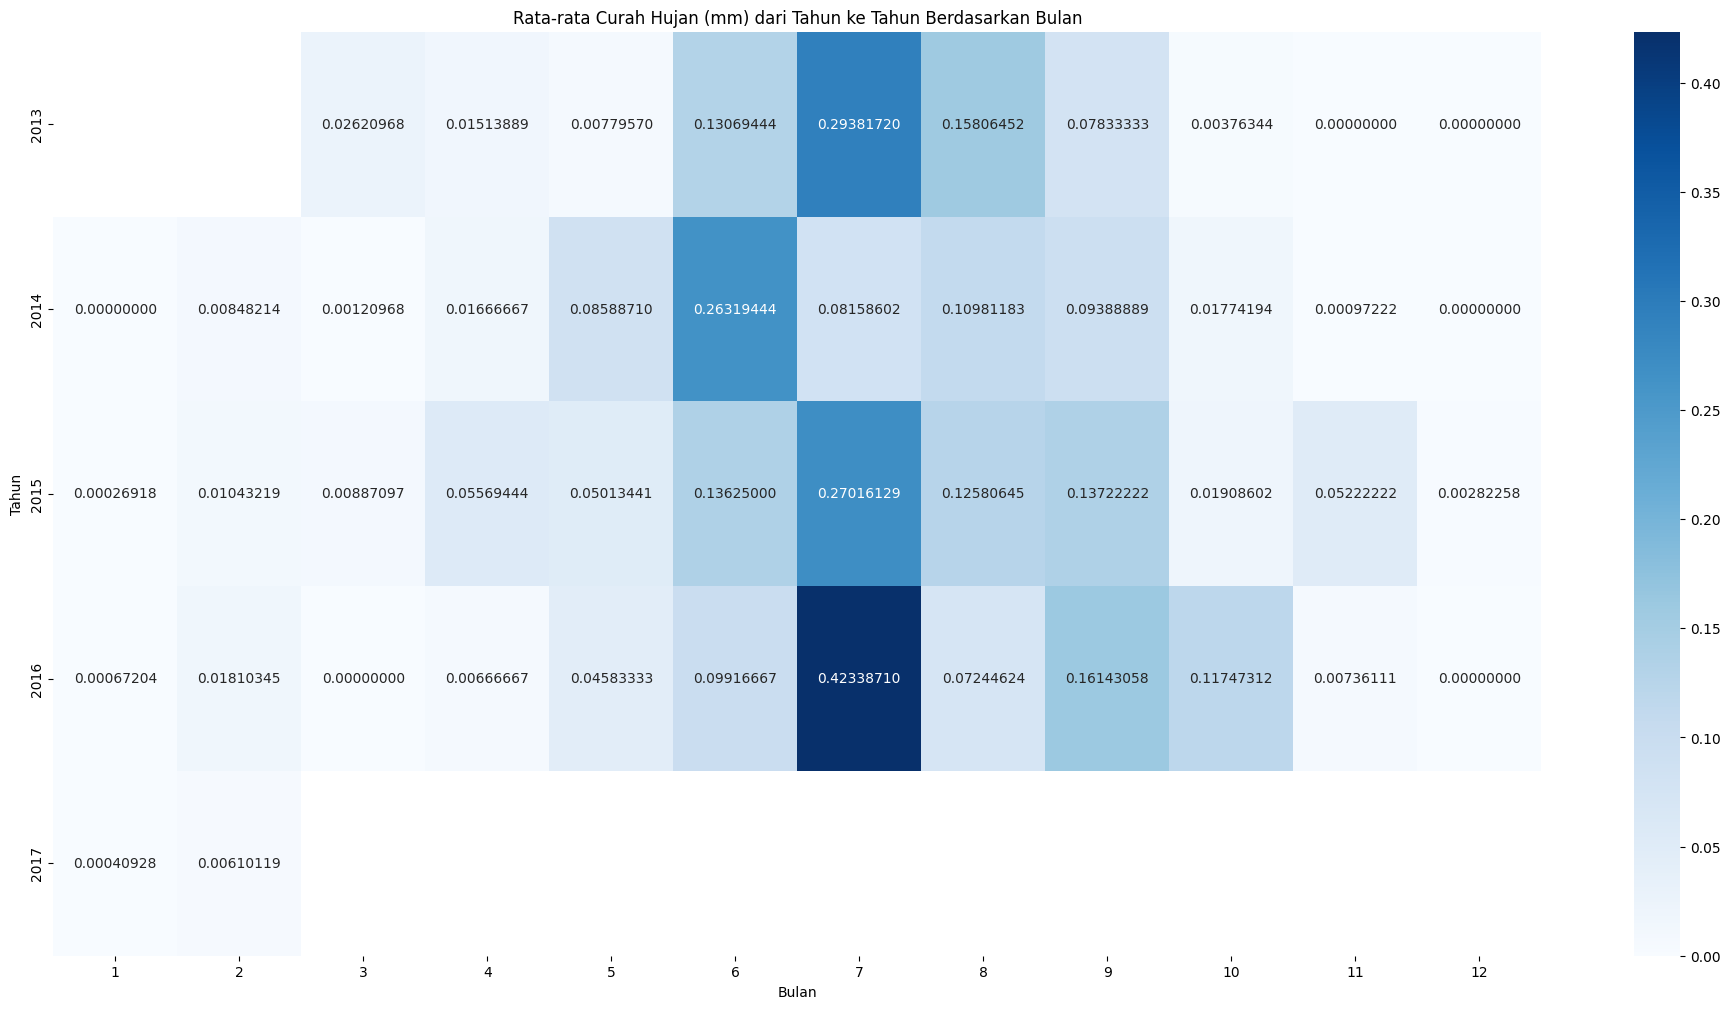

In [12]:
rain_avg = df.groupby(['year', 'month'])['RAIN'].mean().reset_index()

# Buat pivot table untuk heatmap
rain_pivot = rain_avg.pivot(index='year', columns='month', values='RAIN')

# Plot menggunakan heatmap
plt.figure(figsize=(24, 12))
sns.heatmap(rain_pivot, cmap="Blues", annot=True, fmt=".8f")
plt.title("Rata-rata Curah Hujan (mm) dari Tahun ke Tahun Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Tahun")
plt.show()

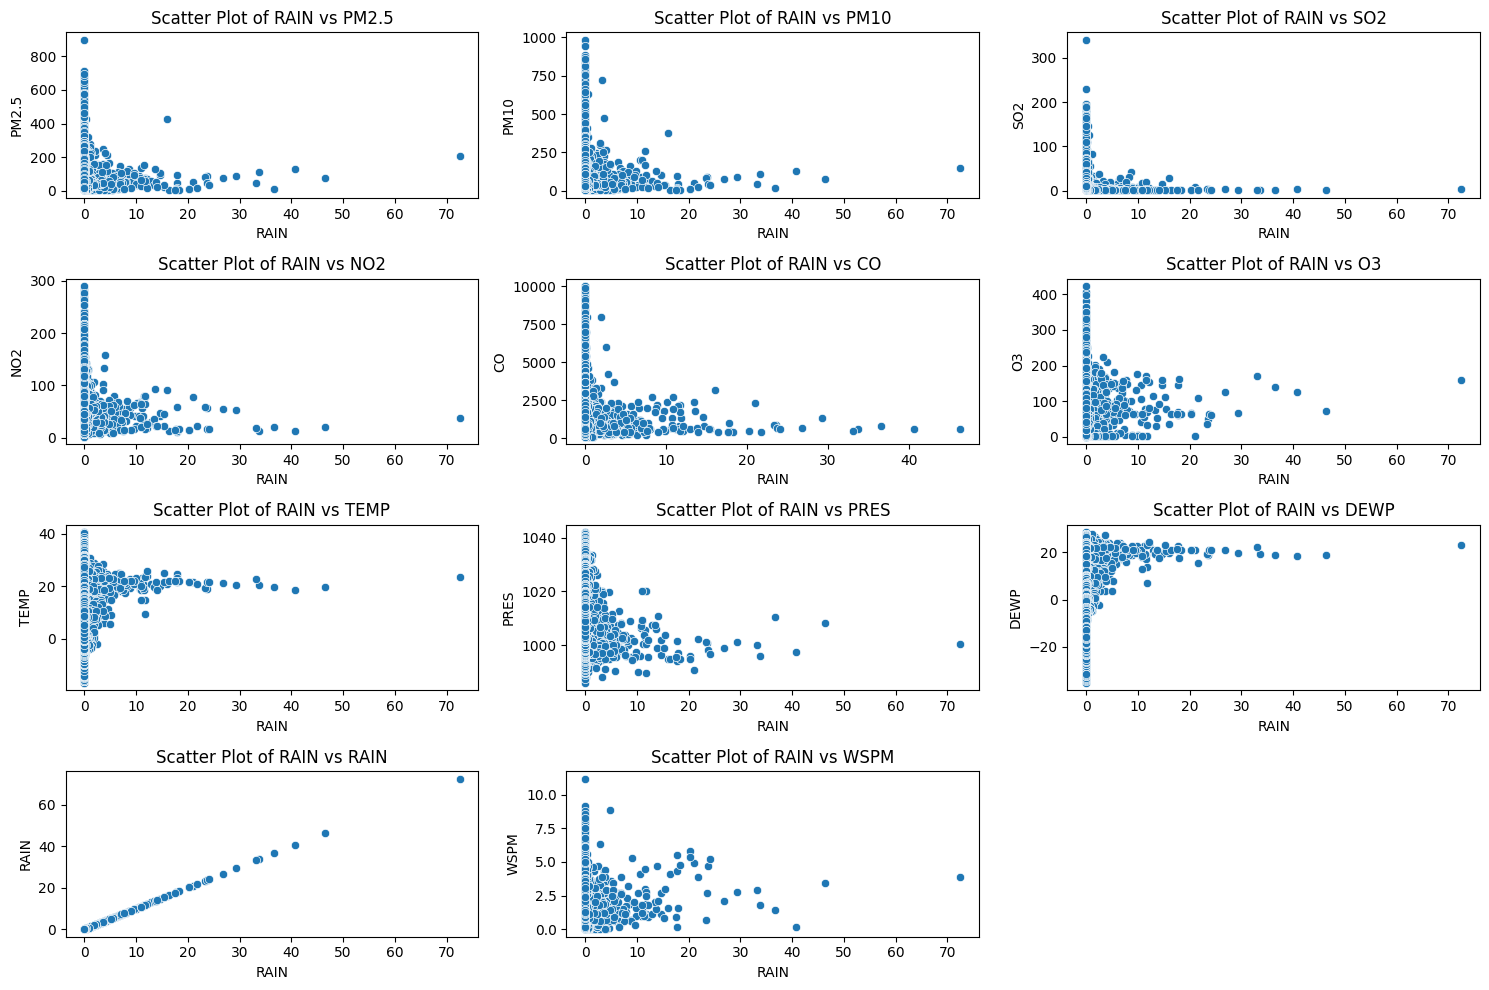

In [13]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Iterate through each numeric column and create a histogram
for i, col in enumerate(df_numeric.columns):
    plt.subplot(4, 3, i + 1)  # Adjust subplot layout as needed
    sns.scatterplot(x=df['RAIN'], y=df_numeric[col])  # Added kde for density estimation
    plt.title(f'Scatter Plot of RAIN vs {col}')
    plt.xlabel('RAIN')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [14]:
df_numeric.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.879104,0.481025,0.684986,0.785006,-0.161448,-0.129415,-0.005727,0.120112,-0.014004,-0.278740
PM10,0.879104,1.000000,0.469045,0.652325,0.680404,-0.139914,-0.111147,-0.035594,0.061667,-0.027795,-0.183132
SO2,0.481025,0.469045,1.000000,0.432081,0.540275,-0.200193,-0.350608,0.203921,-0.282565,-0.041609,-0.113115
NO2,0.684986,0.652325,0.432081,1.000000,0.690202,-0.500380,-0.241059,0.081636,0.067344,-0.040077,-0.491570
CO,0.785006,0.680404,0.540275,0.690202,1.000000,-0.326462,-0.366898,0.215556,-0.098120,-0.018429,-0.284888
O3,-0.161448,-0.139914,-0.200193,-0.500380,-0.326462,1.000000,0.589063,-0.424294,0.294944,0.025099,0.341100
TEMP,-0.129415,-0.111147,-0.350608,-0.241059,-0.366898,0.589063,1.000000,-0.827133,0.823099,0.036601,0.037913
PRES,-0.005727,-0.035594,0.203921,0.081636,0.215556,-0.424294,-0.827133,1.000000,-0.776384,-0.060403,0.071322
DEWP,0.120112,0.061667,-0.282565,0.067344,-0.098120,0.294944,0.823099,-0.776384,1.000000,0.080789,-0.305063
RAIN,-0.014004,-0.027795,-0.041609,-0.040077,-0.018429,0.025099,0.036601,-0.060403,0.080789,1.000000,0.022475


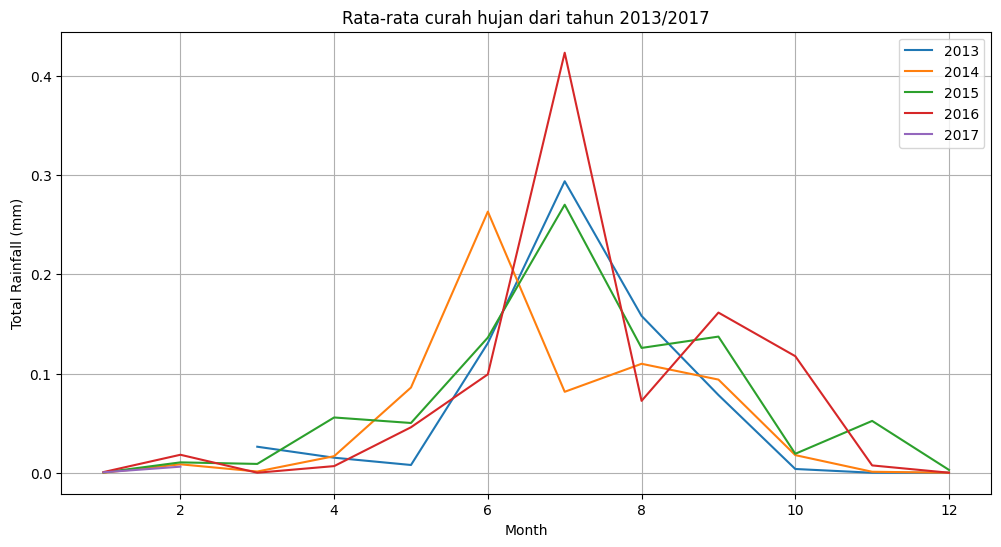

In [15]:
# Group data by year and month, then sum the rainfall
rain_sum = df.groupby(['year', 'month'])['RAIN'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
for year in rain_sum['year'].unique():
    year_data = rain_sum[rain_sum['year'] == year]
    plt.plot(year_data['month'], year_data['RAIN'], label=str(year))

plt.xlabel("Month")
plt.ylabel("Total Rainfall (mm)")
plt.title("Rata-rata curah hujan dari tahun 2013/2017")
plt.legend()
plt.grid(True)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
df = df.drop(columns = ['station'])

In [17]:
# Mengisi missing value kolom numerik dengan rata-rata
for col in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']:
    df[col] = df[col].fillna(value=df[col].mean())

# Mengisi missing value kolom kategorik dengan modus
df['wd'] = df['wd'].fillna(df['wd'].mode()[0])

#Melihat kembali data apakah masih ada missing value
print(df.isna().sum())

No       0
year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64


In [18]:
# Imputasi outlier dengan IQR
def impute_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

df_no_outlier = df.copy()
# Lakukan hal yang sama untuk kolom lain yang mengandung outlier
for col in ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM', 'PM2.5', 'RAIN']:
    df_no_outlier = impute_outliers_iqr(df_no_outlier, col)

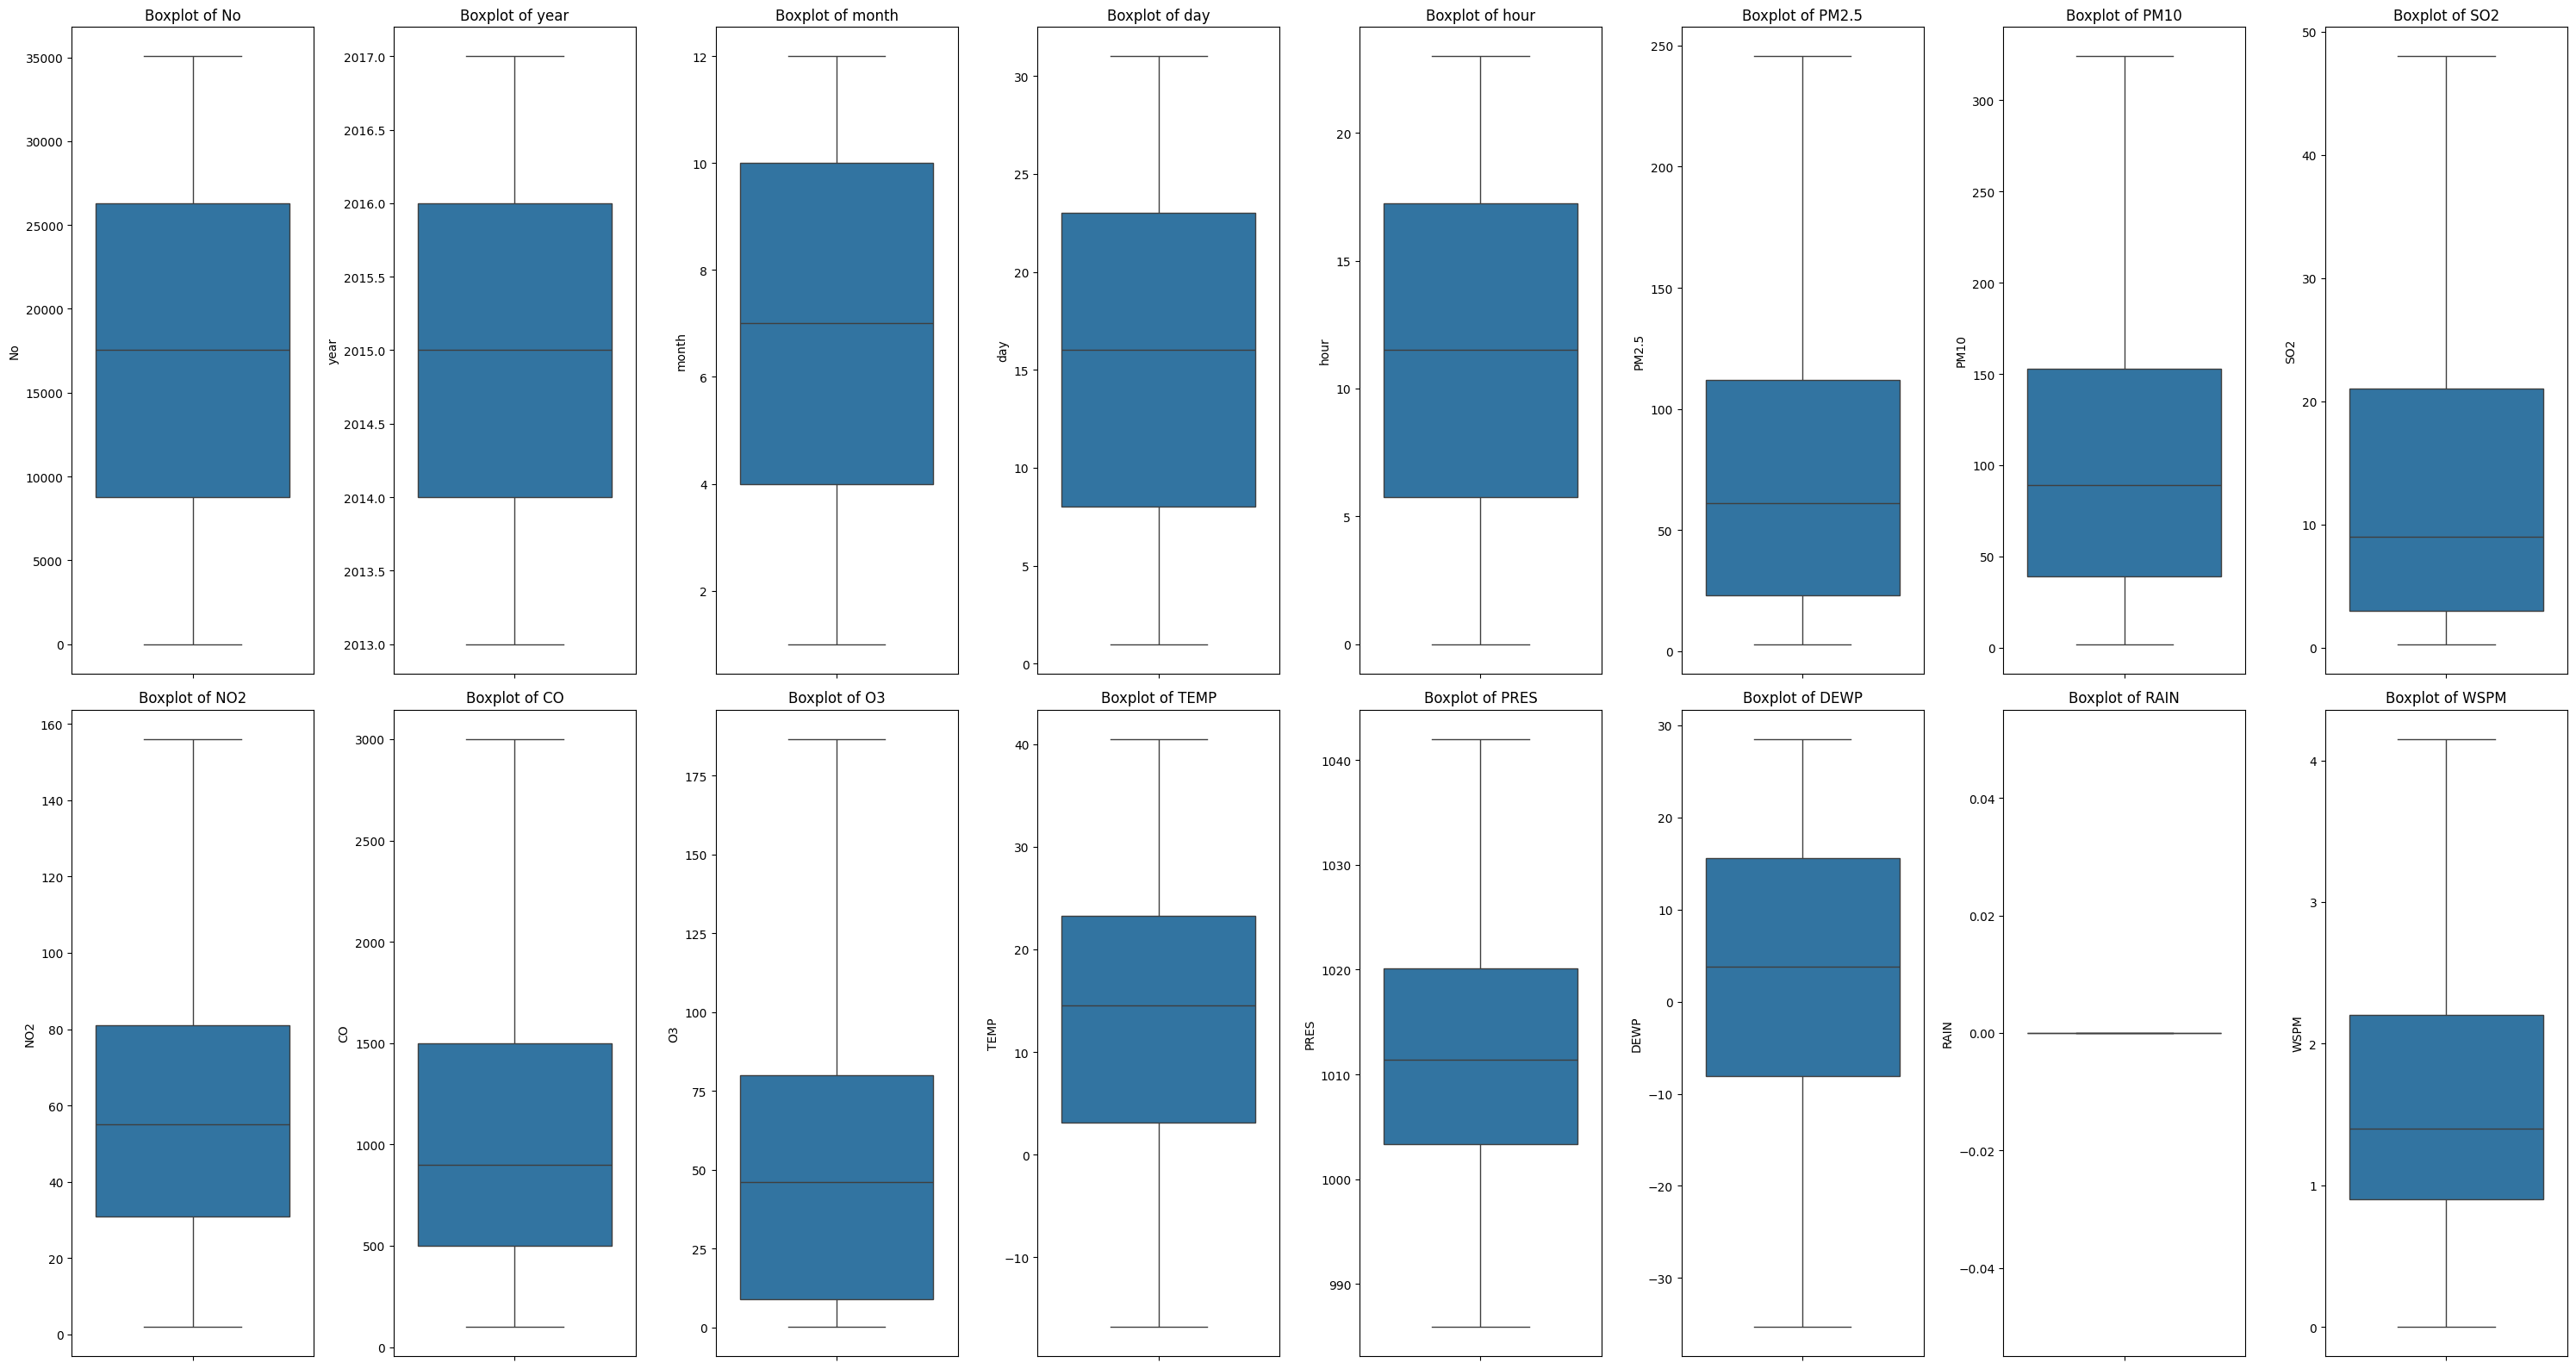

In [19]:
# Mengatur ukuran figure
plt.figure(figsize=(30, 16))

# Loop melalui setiap kolom dalam dataset
df_select_numeric = df_no_outlier.select_dtypes(include=['number']) # Hanya kolom numerik
for i, col in enumerate(df_select_numeric.columns, 1):
    plt.subplot(2, (len(df_select_numeric.columns) + 1) // 2, i)
    sns.boxplot(y=df_select_numeric[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()

In [20]:
df_no_outlier['RAIN'].value_counts()

,count
RAIN,
0.0,35064


In [21]:
rain = df['RAIN']
for index, value in rain.items():
  if value == 0:
    df.loc[index, 'RAIN_Category'] = 'Tidak Hujan'
  else:
    df.loc[index, 'RAIN_Category'] = 'Hujan'

In [22]:
df['RAIN_Category'].value_counts()

,count
RAIN_Category,
Tidak Hujan,33664
Hujan,1400


In [23]:
# Lakukan hal yang sama untuk kolom lain yang mengandung outlier
for col in ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM', 'PM2.5']:
    impute_outliers_iqr(df, col)

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
import mlflow
import mlflow.sklearn
import mlflow.keras
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import dagshub
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

def load_data(file_path):
    df = pd.read_csv(file_path)
    print(f"Dataset dimuat dari {file_path}")
    return df

def feature_engineering(df):
    scaler = StandardScaler()

    # Identify numerical columns for scaling after other processing
    # Assuming X will have 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM', 'month', 'day', 'wd_encoded'
    # Let's scale the pollution and weather variables, excluding day/month for now if they are treated as cyclical or categorical later.
    cols_to_scale = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']

    existing_cols_to_scale = [col for col in cols_to_scale if col in df.columns]

    if existing_cols_to_scale:
        df[existing_cols_to_scale] = scaler.fit_transform(df[existing_cols_to_scale])
        print("Selected numerical features successfully normalized.")
    else:
        print("No numerical features to normalize found in the DataFrame.")
    return df

def apply_smote(X, y):
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    print(f"Jumlah kelas setelah SMOTE:\n{pd.Series(y_resampled).value_counts()}")
    return X_resampled, y_resampled

def save_data(df, output_path):
    df.to_csv(output_path, index=False)
    print(f"Data disimpan ke {output_path}")

# Main function yang menjalankan seluruh proses
def main(input_file, output_file):
    # Load data
    df = load_data(input_file)

    # --- Data Preprocessing Steps ---
    # 1. Drop 'No' and 'station' columns as they are not needed for modeling
    df = df.drop(columns=['No', 'station'])

    # 2. Impute missing values for numerical columns with their mean
    all_numerical_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
    for col in all_numerical_cols:
        df[col] = df[col].fillna(value=df[col].mean())

    # 3. Impute missing values for categorical column 'wd' with its mode
    df['wd'] = df['wd'].fillna(df['wd'].mode()[0])

    # 4. Create 'RAIN_Category' column based on the 'RAIN' feature (after missing value imputation)
    # This is done *before* outlier imputation on RAIN to preserve class diversity.
    df['RAIN_Category'] = np.where(df['RAIN'] == 0, 'Tidak Hujan', 'Hujan')

    # 5. Define numerical columns for outlier imputation, excluding 'RAIN'
    # as its categorical version (RAIN_Category) is now the target.
    features_for_outlier_imputation = [col for col in all_numerical_cols if col != 'RAIN']

    # 6. Handle outliers using IQR method for relevant numerical features
    def impute_outliers_iqr_local(data_frame, column):
        Q1 = data_frame[column].quantile(0.25)
        Q3 = data_frame[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data_frame[column] = np.where(data_frame[column] < lower_bound, lower_bound, data_frame[column])
        data_frame[column] = np.where(data_frame[column] > upper_bound, upper_bound, data_frame[column])
        return data_frame

    for col in features_for_outlier_imputation:
        df = impute_outliers_iqr_local(df, col)

    # 7. Encode the categorical 'wd' column
    le = LabelEncoder()
    df['wd_encoded'] = le.fit_transform(df['wd'])
    df = df.drop(columns=['wd']) # Drop the original 'wd' column

    print("Data cleaning and initial feature preparation complete.")
    # --- End of Data Preprocessing Steps ---

    # Pisahkan fitur (X) dan target (y)
    # 'RAIN' is dropped here because 'RAIN_Category' is the new target
    X = df.drop(['RAIN', 'RAIN_Category', 'year', 'hour'], axis=1)
    y = df['RAIN_Category']

    # Terapkan SMOTE untuk menangani imbalance
    X_resampled, y_resampled = apply_smote(X, y)

    # Lakukan rekayasa fitur (normalization/scaling) on the resampled features X
    # Ensure only numerical columns in X are passed to feature_engineering
    X_scaled = feature_engineering(pd.DataFrame(X_resampled, columns=X.columns))

    # Combine scaled features with resampled target
    df_processed = X_scaled.copy()
    df_processed['RAIN_Category'] = y_resampled

    # Simpan data yang sudah diproses
    save_data(df_processed, output_file)
    print("Preprocessing selesai. Data siap untuk digunakan.")

# Untuk menjalankan fungsi secara otomatis jika file dieksekusi
if __name__ == "__main__":
    input_file = "/content/drive/MyDrive/Tugas Akhir MSML/PRSA_Data_Aotizhongxin.csv"
    output_file = "PRSA_Data_Aotizhongxin_preprocessing.csv"
    main(input_file, output_file)

Dataset dimuat dari /content/drive/MyDrive/Tugas Akhir MSML/PRSA_Data_Aotizhongxin.csv
Data cleaning and initial feature preparation complete.
Jumlah kelas setelah SMOTE:
RAIN_Category
Tidak Hujan    33664
Hujan          33664
Name: count, dtype: int64
Selected numerical features successfully normalized.
Data disimpan ke PRSA_Data_Aotizhongxin_preprocessing.csv
Preprocessing selesai. Data siap untuk digunakan.


# **6. Modelling**

In [26]:
dagshub.init(repo_owner="m.ilham2408", repo_name="my-first-repo", mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=7d1381e9-524b-4ad7-867c-d7722cdd3237&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=5196d5ca7eae9bc1f9af344d4d3c78763a99e0da43681625ee1f7f5729dca86a




Accessing as m.ilham2408

Initialized MLflow to track repo "m.ilham2408/my-first-repo"

Repository m.ilham2408/my-first-repo initialized!

In [27]:
mlflow.set_tracking_uri("https://dagshub.com/m.ilham2408/my-first-repo.mlflow")
mlflow.set_experiment("Tugas Akhir MSML")

<Experiment: artifact_location='mlflow-artifacts:/03b03a18d50e44788056bb9dae9457b4', creation_time=1766494835278, experiment_id='0', last_update_time=1766494835278, lifecycle_stage='active', name='Tugas Akhir MSML', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [28]:
df = pd.read_csv("/content/PRSA_Data_Aotizhongxin_preprocessing.csv")

# The 'RAIN_Category' column is already present and balanced from the preprocessing step.
# It also has already been mapped back to categorical labels ('Tidak Hujan', 'Hujan') before saving.

X = df.drop(['RAIN_Category'], axis=1) # Only drop the target column to get features
y = df['RAIN_Category']  # Target

# Convert target variable to numerical for roc_curve and other metrics
# 'Tidak Hujan' = 0, 'Hujan' = 1
y = y.map({'Tidak Hujan': 0, 'Hujan': 1})

# Add a check to explicitly show the y.value_counts() after loading to confirm the data balance
print("Value counts of RAIN_Category after loading and mapping:")
print(y.value_counts())

# Membagi data menjadi train dan test, ensuring stratification for class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Value counts of RAIN_Category after loading and mapping:
RAIN_Category
0    33664
1    33664
Name: count, dtype: int64


In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Menentukan eksperimen MLflow dan memulai tracking
mlflow.set_experiment("Tugas Akhir MSML")

with mlflow.start_run(run_name="Initial RandomForest Model"):
    # Menyimpan parameter model
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)

    # Melatih model
    model.fit(X_train, y_train)

    # Prediksi dan evaluasi
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Log metrik standar
    mlflow.log_metric("accuracy", accuracy)

    # Log metrik tambahan (precision, recall, f1-score, roc_auc_score)
    precision_0 = precision_score(y_test, y_pred, pos_label=0)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    f1_0 = f1_score(y_test, y_pred, pos_label=0)

    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)

    mlflow.log_metric("precision_class_0", precision_0)
    mlflow.log_metric("recall_class_0", recall_0)
    mlflow.log_metric("f1_score_class_0", f1_0)

    mlflow.log_metric("precision_class_1", precision_1)
    mlflow.log_metric("recall_class_1", recall_1)
    mlflow.log_metric("f1_score_class_1", f1_1)

    roc_auc = roc_auc_score(y_test, y_pred)
    mlflow.log_metric("roc_auc_score", roc_auc)

    # Buat dan simpan Confusion Matrix sebagai artefak
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Tidak Hujan', 'Hujan'], yticklabels=['Tidak Hujan', 'Hujan'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    plt.close()

    # Buat dan simpan ROC Curve sebagai artefak
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")
    plt.close()

    # Menyimpan model ke MLflow
    mlflow.sklearn.log_model(model, "initial_random_forest_model")

    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC Score: {roc_auc}")

2025/12/24 06:55:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Accuracy: 0.9826971632259023
ROC AUC Score: 0.9826971632259024
🏃 View run Initial RandomForest Model at: https://dagshub.com/m.ilham2408/my-first-repo.mlflow/#/experiments/0/runs/8d742604011246f0b2288bd1bf251785
🧪 View experiment at: https://dagshub.com/m.ilham2408/my-first-repo.mlflow/#/experiments/0


In [30]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
}

# Mencari parameter terbaik
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, random_state=42)
with mlflow.start_run(run_name="RandomizedSearchCV Best Model"):
    # Menyimpan parameter dan model (pindahkan log_params setelah fit)
    mlflow.log_param("search_method", "RandomizedSearchCV")

    random_search.fit(X_train, y_train)

    # Sekarang best_params_ sudah tersedia setelah fit()
    mlflow.log_params(random_search.best_params_)

    # Menyimpan hasil metrik dan model terbaik
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    mlflow.log_metric("accuracy", accuracy)

    # Log metrik tambahan (precision, recall, f1-score, roc_auc_score)
    precision_0 = precision_score(y_test, y_pred, pos_label=0)
    recall_0 = recall_score(y_test, y_pred, pos_label=0)
    f1_0 = f1_score(y_test, y_pred, pos_label=0)

    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)

    mlflow.log_metric("precision_class_0", precision_0)
    mlflow.log_metric("recall_class_0", recall_0)
    mlflow.log_metric("f1_score_class_0", f1_0)

    mlflow.log_metric("precision_class_1", precision_1)
    mlflow.log_metric("recall_class_1", recall_1)
    mlflow.log_metric("f1_score_class_1", f1_1)

    roc_auc = roc_auc_score(y_test, y_pred)
    mlflow.log_metric("roc_auc_score", roc_auc)

    # Buat dan simpan Confusion Matrix sebagai artefak
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Tidak Hujan', 'Hujan'], yticklabels=['Tidak Hujan', 'Hujan'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Best Model')
    plt.tight_layout()
    plt.savefig("confusion_matrix_best_model.png")
    mlflow.log_artifact("confusion_matrix_best_model.png")
    plt.close()

    # Buat dan simpan ROC Curve sebagai artefak
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Best Model')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("roc_curve_best_model.png")
    mlflow.log_artifact("roc_curve_best_model.png")
    plt.close()

    mlflow.sklearn.log_model(best_model, "best_random_forest_model")

    print(f"Best Model Accuracy: {accuracy}")
    print(f"Best Model ROC AUC Score: {roc_auc}")

2025/12/24 07:12:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Best Model Accuracy: 0.9829199465320065
Best Model ROC AUC Score: 0.9829199465320065
🏃 View run RandomizedSearchCV Best Model at: https://dagshub.com/m.ilham2408/my-first-repo.mlflow/#/experiments/0/runs/ca2fc868a00f4472a4e2a75b8c39c098
🧪 View experiment at: https://dagshub.com/m.ilham2408/my-first-repo.mlflow/#/experiments/0


Confusion Matrix:
 [[6550  183]
 [  47 6686]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      6733
           1       0.97      0.99      0.98      6733

    accuracy                           0.98     13466
   macro avg       0.98      0.98      0.98     13466
weighted avg       0.98      0.98      0.98     13466

ROC AUC Score:  0.9829199465320065


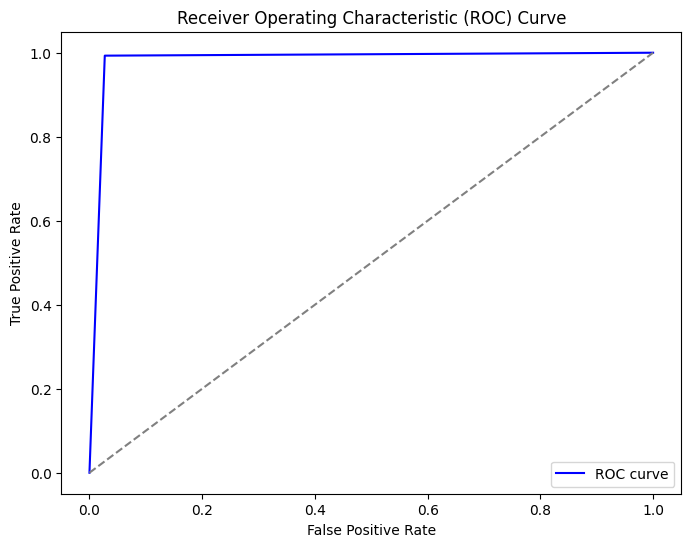

In [31]:
if y_pred.dtype == object and isinstance(y_pred[0], str):
    y_pred_numeric = pd.Series(y_pred).map({'Tidak Hujan': 0, 'Hujan': 1}).values
else:
    y_pred_numeric = y_pred

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_numeric)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_numeric))

# ROC Curve (untuk klasifikasi biner)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_numeric)
print("ROC AUC Score: ", roc_auc_score(y_test, y_pred_numeric))

# Optionally, you can visualize the ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Initialized MLflow to track repo "m.ilham2408/my-first-repo"

Repository m.ilham2408/my-first-repo initialized!

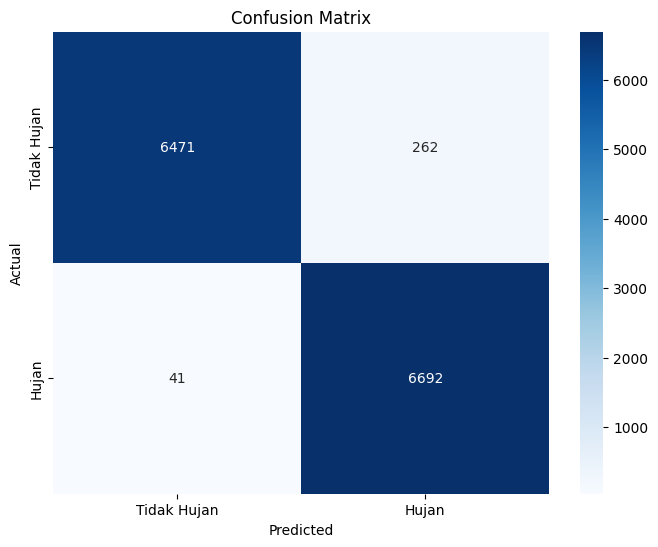

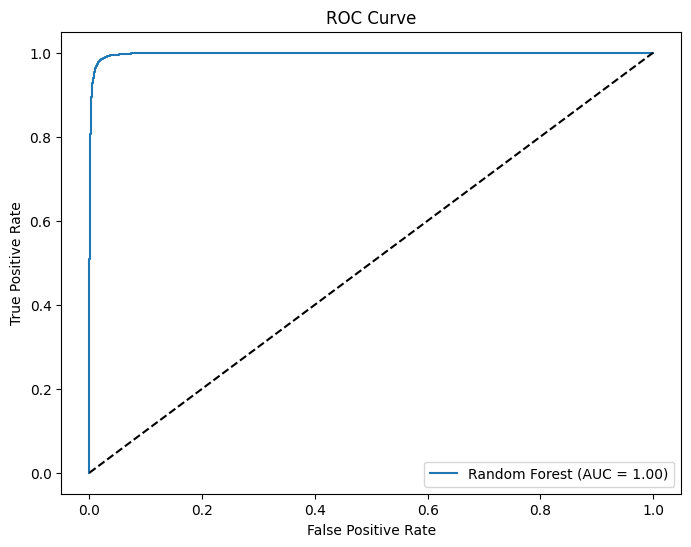

2025/12/24 07:58:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


✅ Eksperimen Selesai! Accuracy: 0.9775
🚀 Semua artifak (Report, CM, ROC, Joblib) sudah terupload ke Dagshub.
🏃 View run Colab_Tuned_RF_Final at: https://dagshub.com/m.ilham2408/my-first-repo.mlflow/#/experiments/0/runs/7de3356acf2e47628ece0334878506e4
🧪 View experiment at: https://dagshub.com/m.ilham2408/my-first-repo.mlflow/#/experiments/0


In [35]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import dagshub
dagshub.init(repo_owner='m.ilham2408', repo_name='my-first-repo') # Removed display_auth=False
mlflow.set_tracking_uri("https://dagshub.com/m.ilham2408/my-first-repo.mlflow")
mlflow.set_experiment("Tugas Akhir MSML")

best_params = {
    'n_estimators': 200,
    'max_depth': 20,
    'min_samples_split': 2,
    'random_state': 42
}

with mlflow.start_run(run_name="Colab_Tuned_RF_Final"):
    mlflow.log_params(best_params)

    model = RandomForestClassifier(**best_params)
    model.fit(X_train, y_train) # Changed X_train_res, y_train_res to X_train, y_train

    # Prediksi
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("roc_auc", roc_auc)


    # 1. Artifak: Classification Report (.txt)
    report = classification_report(y_test, y_pred, target_names=['Tidak Hujan', 'Hujan'])
    with open("classification_report.txt", "w") as f:
        f.write(report)
    mlflow.log_artifact("classification_report.txt")

    # 2. Artifak: Confusion Matrix (.png)
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Tidak Hujan', 'Hujan'], yticklabels=['Tidak Hujan', 'Hujan'])
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")
    plt.show()

    # 3. Artifak: ROC Curve (.png)
    plt.figure(figsize=(8, 6))
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")
    plt.show()

    # 4. Artifak: Local Model (.joblib)
    joblib.dump(model, "random_forest_model.joblib")
    mlflow.log_artifact("random_forest_model.joblib")

    # 5. Log Model via MLflow
    mlflow.sklearn.log_model(model, "model")

    print(f"✅ Eksperimen Selesai! Accuracy: {acc:.4f}")
    print("🚀 Semua artifak (Report, CM, ROC, Joblib) sudah terupload ke Dagshub.")

In [32]:
with mlflow.start_run():
    mlflow.log_param("example", "Saving model to DagsHub")
    mlflow.sklearn.log_model(model, "model")
    print("Model saved to DagsHub")

2025/12/24 07:12:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Model saved to DagsHub
🏃 View run brawny-croc-568 at: https://dagshub.com/m.ilham2408/my-first-repo.mlflow/#/experiments/0/runs/1c51645c69c1436cb9e42f1ac1e9590e
🧪 View experiment at: https://dagshub.com/m.ilham2408/my-first-repo.mlflow/#/experiments/0


In [33]:
import subprocess

# Get the list of installed packages
result = subprocess.run(['pip', 'freeze'], capture_output=True, text=True)
requirements_content = result.stdout

# Define the file name
requirements_file = 'requirements.txt'

# Save the content to requirements.txt
with open(requirements_file, 'w') as f:
    f.write(requirements_content)

print(f"File '{requirements_file}' telah dibuat dan disimpan.")
print("Isi dari requirements.txt:")
print(requirements_content)

File 'requirements.txt' telah dibuat dan disimpan.
Isi dari requirements.txt:
absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.2
aiosignal==1.4.0
aiosqlite==0.22.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.2
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.0
anywidget==0.9.21
appdirs==1.4.4
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2025.12.15.0.40.51
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backoff==2.2.1
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.30.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.12.2
bokeh==3.7.3
boto3==1.42.16
botocore==1.42.16
Bottleneck==1.4.2
bqplot==0.